## Scaling and normalizing features

#### Saling and normalizing features helps some of the machine learning algorithms that are based on calculating distances to perform better

#### Tags:
    Data: labeled data, Kaggle competition
    Technologies: python, pandas, scikit-learn
    Techniques: data transformation
    
#### Resources:
[Kaggle competition data](https://www.kaggle.com/mohansacharya/graduate-admissions)



In [20]:
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [21]:
# import the relevant dataset
df = pd.read_csv('../data/Admission_Predict_Ver1.1.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


##### There are 500 observations and all of the columns are numeric, 
hence we can take a look at descriptive statistics to understand 
the ranges of each of the variables

In [22]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


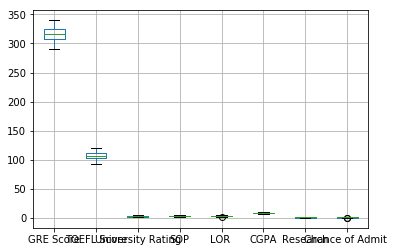

In [29]:
df[df.columns[1:]].boxplot()

For instance mean of the column SOP is 2 orders of magnitude smaller than the GRE Score, hence if we would choose an algorithm using some iterative approach to find the solution then the algorithm will converge faster if the features are scaled. 

### Standardizing the data
Standardizing the data removes the mean value from each data point and divides by its standard deviation, hence the mean of the sample becomes 0, and the variance and standard deviation become 1. This is done for all features, hence all of them are centralized and have a similar range of values. 

Equation:

$\frac{x_i-mean(x)}{stddev(x)}$

In [15]:
# we can use sikict-learn libarary to scale the data

scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

# fit_transform returns an array, hence i convert it back to df
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null float64
GRE Score            500 non-null float64
TOEFL Score          500 non-null float64
University Rating    500 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null float64
Chance of Admit      500 non-null float64
dtypes: float64(9)
memory usage: 35.2 KB


/home/spavko/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/spavko/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
# By the process all columns are implicitly converted to float64
df_scaled.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-9.059420e-17,1.783684e-15,1.202149e-15,-6.439294e-17,2.926548e-16,-1.332268e-17,3.091971e-15,-2.202682e-16,-3.257394e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.728590e+00,-2.346008e+00,-2.500419e+00,-1.850542e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00,-2.707391e+00
25%,-8.642951e-01,-7.508077e-01,-6.899523e-01,-9.751676e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00,-6.506420e-01
50%,0.000000e+00,4.679255e-02,-3.160087e-02,-9.979274e-02,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01,-1.234050e-02
75%,8.642951e-01,7.557706e-01,7.913384e-01,7.755821e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01,6.968834e-01
max,1.728590e+00,2.085104e+00,2.108041e+00,1.650957e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01,1.760719e+00


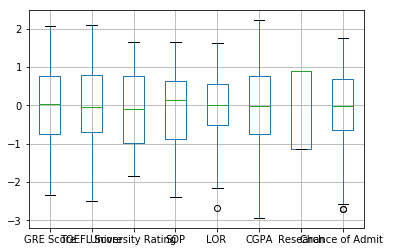

In [30]:
df_scaled[df_scaled.columns[1:]].boxplot()

### Normalizing the data
Normalizing the data sets the range of data values from 0 to 1.The fromula used to calculate is:

$\frac{x_i - min(x)}{max(x) - min(x)}$

It is best used on the features that might not follow the approx. Normal distribution and is sensitive to extreme outliers. Again, we can use the sklearn to normalize the data.


In [17]:
scaler = preprocessing.MinMaxScaler()
df_norm = scaler.fit_transform(df)

# fit_transform returns an array, hence i convert it back to df
df_norm  = pd.DataFrame(df_norm ,columns=df.columns)
df_norm .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null float64
GRE Score            500 non-null float64
TOEFL Score          500 non-null float64
University Rating    500 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null float64
Chance of Admit      500 non-null float64
dtypes: float64(9)
memory usage: 35.2 KB


/home/spavko/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
# By the process all columns are implicitly converted to float64
df_norm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.500000,0.529440,0.542571,0.528500,0.593500,0.621000,0.569372,0.560000,0.605937
std,0.289543,0.225903,0.217210,0.285878,0.247751,0.231362,0.193850,0.496884,0.224032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.360000,0.392857,0.250000,0.375000,0.500000,0.425481,0.000000,0.460317
50%,0.500000,0.540000,0.535714,0.500000,0.625000,0.625000,0.564103,1.000000,0.603175
75%,0.750000,0.700000,0.714286,0.750000,0.750000,0.750000,0.717949,1.000000,0.761905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


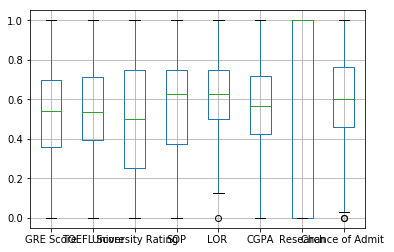

In [31]:
# The data has minimum 0 and maximum 1 and can be compared

df_norm[df_norm.columns[1:]].boxplot()